<a href="https://colab.research.google.com/github/j174456/trabalho-SI101/blob/master/2dassets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
ds1= pd.read_csv('2d_dataset_1.csv')
ds2= pd.read_csv('2d_dataset_2.csv')
ds3= pd.read_csv('2d_dataset_3.csv')
ds4= pd.read_csv('2d_dataset_4.csv')
ds1.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,y,alpha,beta
0,1,94,212
1,0,875,700
2,0,877,766
3,0,811,941
4,1,97,178


##analise do dataset

In [2]:
ds1.describe()

,y,alpha,beta
count,509.000000,509.000000,509.000000
mean,0.473477,521.041257,529.379175
std,0.499787,328.287624,334.076091
min,0.000000,74.000000,58.000000
25%,0.000000,186.000000,192.000000
50%,0.000000,720.000000,715.000000
75%,1.000000,833.000000,846.000000
max,1.000000,940.000000,961.000000


In [3]:
ds1.alpha.value_counts()

141    5
272    4
754    4
812    4
826    4
      ..
199    1
198    1
196    1
787    1
904    1
Name: alpha, Length: 306, dtype: int64

In [4]:
ds1.beta.value_counts()

224    5
841    5
154    5
168    4
182    4
      ..
235    1
746    1
134    1
243    1
856    1
Name: beta, Length: 325, dtype: int64

In [5]:
ds1.y.value_counts()

0    268
1    241
Name: y, dtype: int64

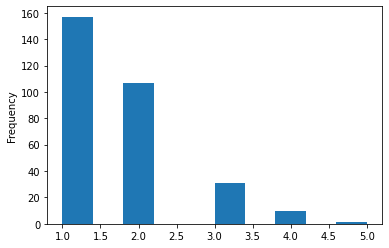

In [6]:
ds1.alpha.value_counts().sort_index().plot.hist()

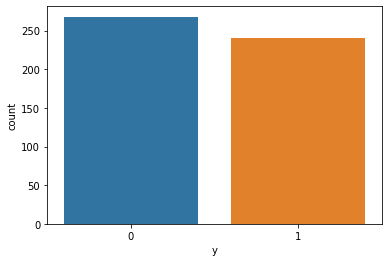

In [7]:
sns.countplot(x="y",data=ds1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


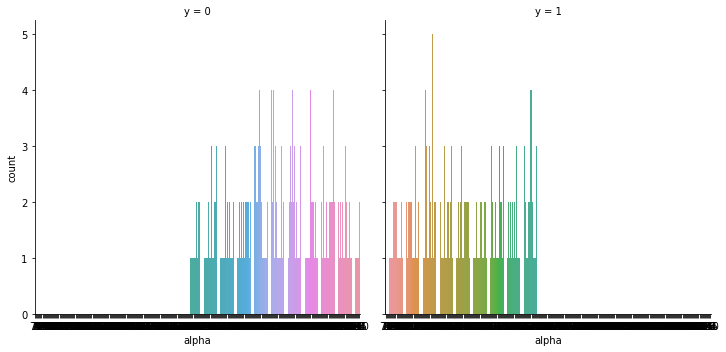

In [8]:
sns.factorplot(x="alpha",col="y",kind="count", data=ds1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


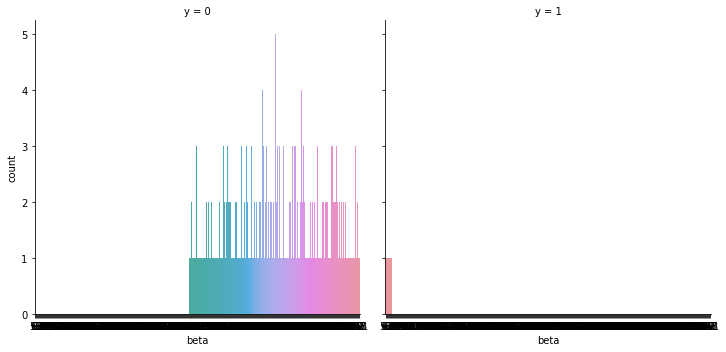

In [9]:
sns.factorplot(x="beta",col="y",kind="count", data=ds1)

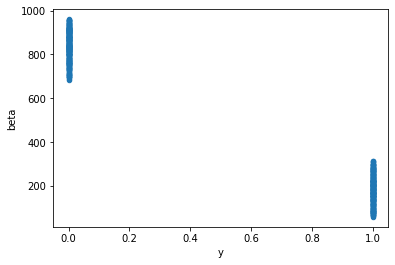

In [10]:
ds1.plot.scatter(x="y",y="beta")

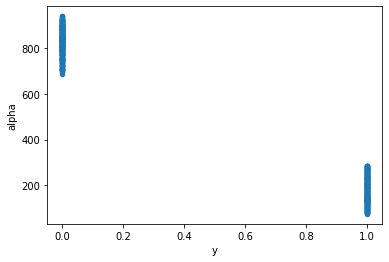

In [11]:
ds1.plot.scatter(x="y",y="alpha")

# Testes manuais

In [12]:
#teste 1
testey =(ds1.alpha >= 521)
testey=testey.apply(lambda x:int(x))
testey
accuracy_score(ds1.y,testey)

0.0

In [13]:
#teste 2
testey =(ds1.beta >= 529)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.0

In [14]:
#teste 3
testey =(ds1.alpha % ds1.beta == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.5245579567779961

In [15]:
#teste 4
testey =(ds1.beta % ds1.alpha == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.5245579567779961

In [16]:
#teste 5
testey =((ds1.alpha + ds1.beta)%2 == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.5049115913555993

In [17]:
#teste 6
testey =((ds1.alpha * ds1.beta)%2 == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.4911591355599214

In [18]:
#teste 7
testey =((ds1.alpha * 2)+ds1.beta == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.5265225933202358

In [19]:
#teste 8
testey =((ds1.beta * 2)+ds1.alpha == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.5265225933202358

# Scikit



##Modelo Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB # 1. Escolha do modelo.
modelo_bayes = GaussianNB()                # 2. Escolha dos hiperparâmetros e intanciação.

In [0]:
# 3 feature matrix
MatrizAB= ds1.loc[:,['alpha','beta']]
MatrizAB

In [0]:
#3 Target Array
ArrayAB= ds1.y
ArrayAB

In [0]:
# 3.3 Separação do Banco de Dados
#from sklearn.model_selection import train_test_split
Mteste1 = ds2.loc[:,['alpha','beta']]
Ateste1 = ds2.y

In [24]:
modelo_bayes.fit(MatrizAB,ArrayAB)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
modelo_bayes_resultado=modelo_bayes.predict(Mteste1)

In [26]:
modelo_bayes_resultado

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [27]:
#teste de acuracia
accuracy_score(Ateste1,modelo_bayes_resultado)

0.849112426035503

# ## modelo da árvore de decisões

In [28]:
from sklearn.tree import DecisionTreeClassifier  
modelo_adecisao = DecisionTreeClassifier()
modelo_adecisao.fit(MatrizAB,ArrayAB)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
modelo_adecisao_resultado=modelo_adecisao.predict(Mteste1)

In [30]:
modelo_adecisao_resultado

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,

In [31]:
accuracy_score(Ateste1,modelo_adecisao_resultado)

0.7204142011834319

## Modelo de Regressão logistica

In [0]:
from sklearn.linear_model import LogisticRegression
modelo_lr=LogisticRegression()

In [33]:
modelo_lr.fit(MatrizAB,ArrayAB)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
modelo_lr_resultado = modelo_lr.predict(Mteste1)

In [35]:
accuracy_score(Ateste1,modelo_lr_resultado)

0.8372781065088757

## Modelo de Rede Neural

In [0]:
from sklearn.neural_network import MLPClassifier
modelo_redeN = MLPClassifier()

In [37]:
modelo_redeN.fit(MatrizAB,ArrayAB)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
modelo_redeN_resultado = modelo_redeN.predict(Mteste1)

In [39]:
accuracy_score(Ateste1,modelo_redeN_resultado)

0.44970414201183434

## Modelo SVC


In [0]:
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
modelo_svc= SVC(C= 0.01,kernel='linear',degree=3,gamma = 'scale',probability=False)

In [153]:
modelo_svc.fit(MatrizAB,ArrayAB)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
modelo_svc_resultado = modelo_svc.predict(Mteste1)

In [155]:
accuracy_score(Ateste1,modelo_svc_resultado)

0.8387573964497042

#Matriz de Confusão

In [0]:
from sklearn.metrics import confusion_matrix
matriz_bayes= confusion_matrix(Ateste1,modelo_bayes_resultado)

Text(83.40000000000006, 0.5, 'Valores Reais')

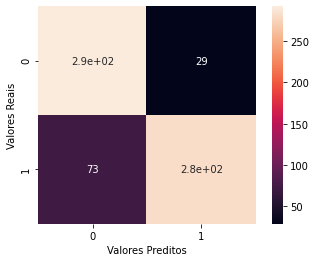

In [41]:
sns.heatmap(matriz_bayes, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

Text(83.40000000000006, 0.5, 'Valores Reais')

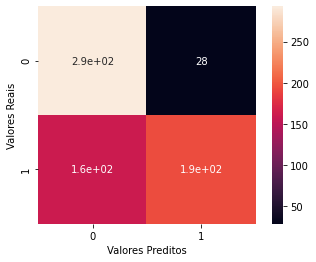

In [42]:
matriz_adecisao= confusion_matrix(Ateste1,modelo_adecisao_resultado)
sns.heatmap(matriz_adecisao, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

Text(83.40000000000006, 0.5, 'Valores Reais')

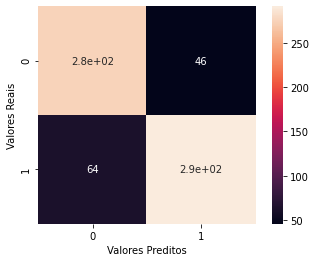

In [43]:
matriz_rl= confusion_matrix(Ateste1,modelo_lr_resultado)
sns.heatmap(matriz_rl, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

Text(83.40000000000006, 0.5, 'Valores Reais')

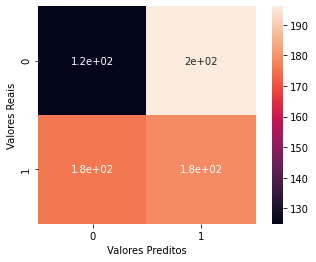

In [44]:
matriz_redeN= confusion_matrix(Ateste1,modelo_redeN_resultado)
sns.heatmap(matriz_redeN, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

# Validação cruzada

In [45]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
modelo_neighbors = KNeighborsClassifier(n_neighbors=3)
cross_val_score(modelo_neighbors, MatrizAB, ArrayAB, cv = 5)

array([1., 1., 1., 1., 1.])

In [46]:
modelo_bayes_cv = GaussianNB()    
cross_val_score(modelo_bayes_cv, MatrizAB, ArrayAB, cv = 5)

array([1., 1., 1., 1., 1.])

In [47]:
modelo_adecisao_cv= DecisionTreeClassifier()
cross_val_score(modelo_adecisao_cv, MatrizAB, ArrayAB, cv = 5)

array([1., 1., 1., 1., 1.])

In [48]:
modelo_lr_cv= LogisticRegression()
cross_val_score(modelo_lr_cv, MatrizAB, ArrayAB, cv = 5)

array([1., 1., 1., 1., 1.])

In [49]:
modelo_redeN_cv= MLPClassifier()
cross_val_score(modelo_redeN_cv, MatrizAB, ArrayAB, cv = 5)

array([0.7745098 , 0.81372549, 0.98039216, 0.98039216, 0.75247525])

In [0]:
from sklearn.model_selection import LeaveOneOut
resultado=cross_val_score(modelo_bayes_cv, MatrizAB, ArrayAB, cv=LeaveOneOut())

In [51]:
resultado.mean()

1.0